In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score

In [2]:
c=pd.read_excel('C:/Users/hp/Downloads/Github/Concrete_Data - Copy.xlsx')
cs=pd.DataFrame(c)
cs.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
cs.isnull().sum()

Cement                           0
Blast_Furnace_Slag               0
Fly_Ash                          0
Water                            0
Superplasticizer                 0
Coarse_Aggregate                 0
Fine_Aggregate                   0
Age                              0
Concrete_compressive_strength    0
dtype: int64

In [4]:
cs.dtypes

Cement                           float64
Blast_Furnace_Slag               float64
Fly_Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse_Aggregate                 float64
Fine_Aggregate                   float64
Age                                int64
Concrete_compressive_strength    float64
dtype: object

In [5]:
cs.describe()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


Cement                              AxesSubplot(0.125,0.536818;0.133621x0.343182)
Blast_Furnace_Slag               AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Fly_Ash                           AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Water                            AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Superplasticizer                 AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Coarse_Aggregate                       AxesSubplot(0.125,0.125;0.133621x0.343182)
Fine_Aggregate                      AxesSubplot(0.285345,0.125;0.133621x0.343182)
Age                                  AxesSubplot(0.44569,0.125;0.133621x0.343182)
Concrete_compressive_strength       AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

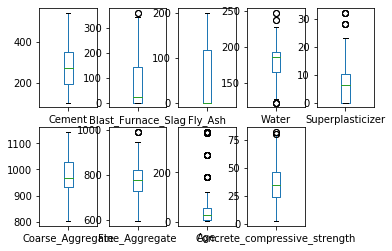

In [6]:
cs.plot(kind='box',subplots=True,layout=(2,5))

In [7]:
cs.drop('Age',axis=1,inplace=True)

In [8]:
cscor=cs.corr()
cscor

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Concrete_compressive_strength
Cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.497833
Blast_Furnace_Slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,0.134824
Fly_Ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.105753
Water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,-0.289613
Superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,0.366102
Coarse_Aggregate,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.164928
Fine_Aggregate,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.167249
Concrete_compressive_strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,1.000000


In [9]:
cs.skew()

Cement                           0.509517
Blast_Furnace_Slag               0.800737
Fly_Ash                          0.537445
Water                            0.074324
Superplasticizer                 0.908113
Coarse_Aggregate                -0.040206
Fine_Aggregate                  -0.252979
Concrete_compressive_strength    0.416922
dtype: float64

In [10]:
import numpy as np
for attrb in cs.columns:
    if cs.skew().loc[attrb]>0.55:
        cs[attrb]=np.log1p(cs[attrb])
cs.skew()

Cement                           0.509517
Blast_Furnace_Slag              -0.032692
Fly_Ash                          0.537445
Water                            0.074324
Superplasticizer                -0.324634
Coarse_Aggregate                -0.040206
Fine_Aggregate                  -0.252979
Concrete_compressive_strength    0.416922
dtype: float64

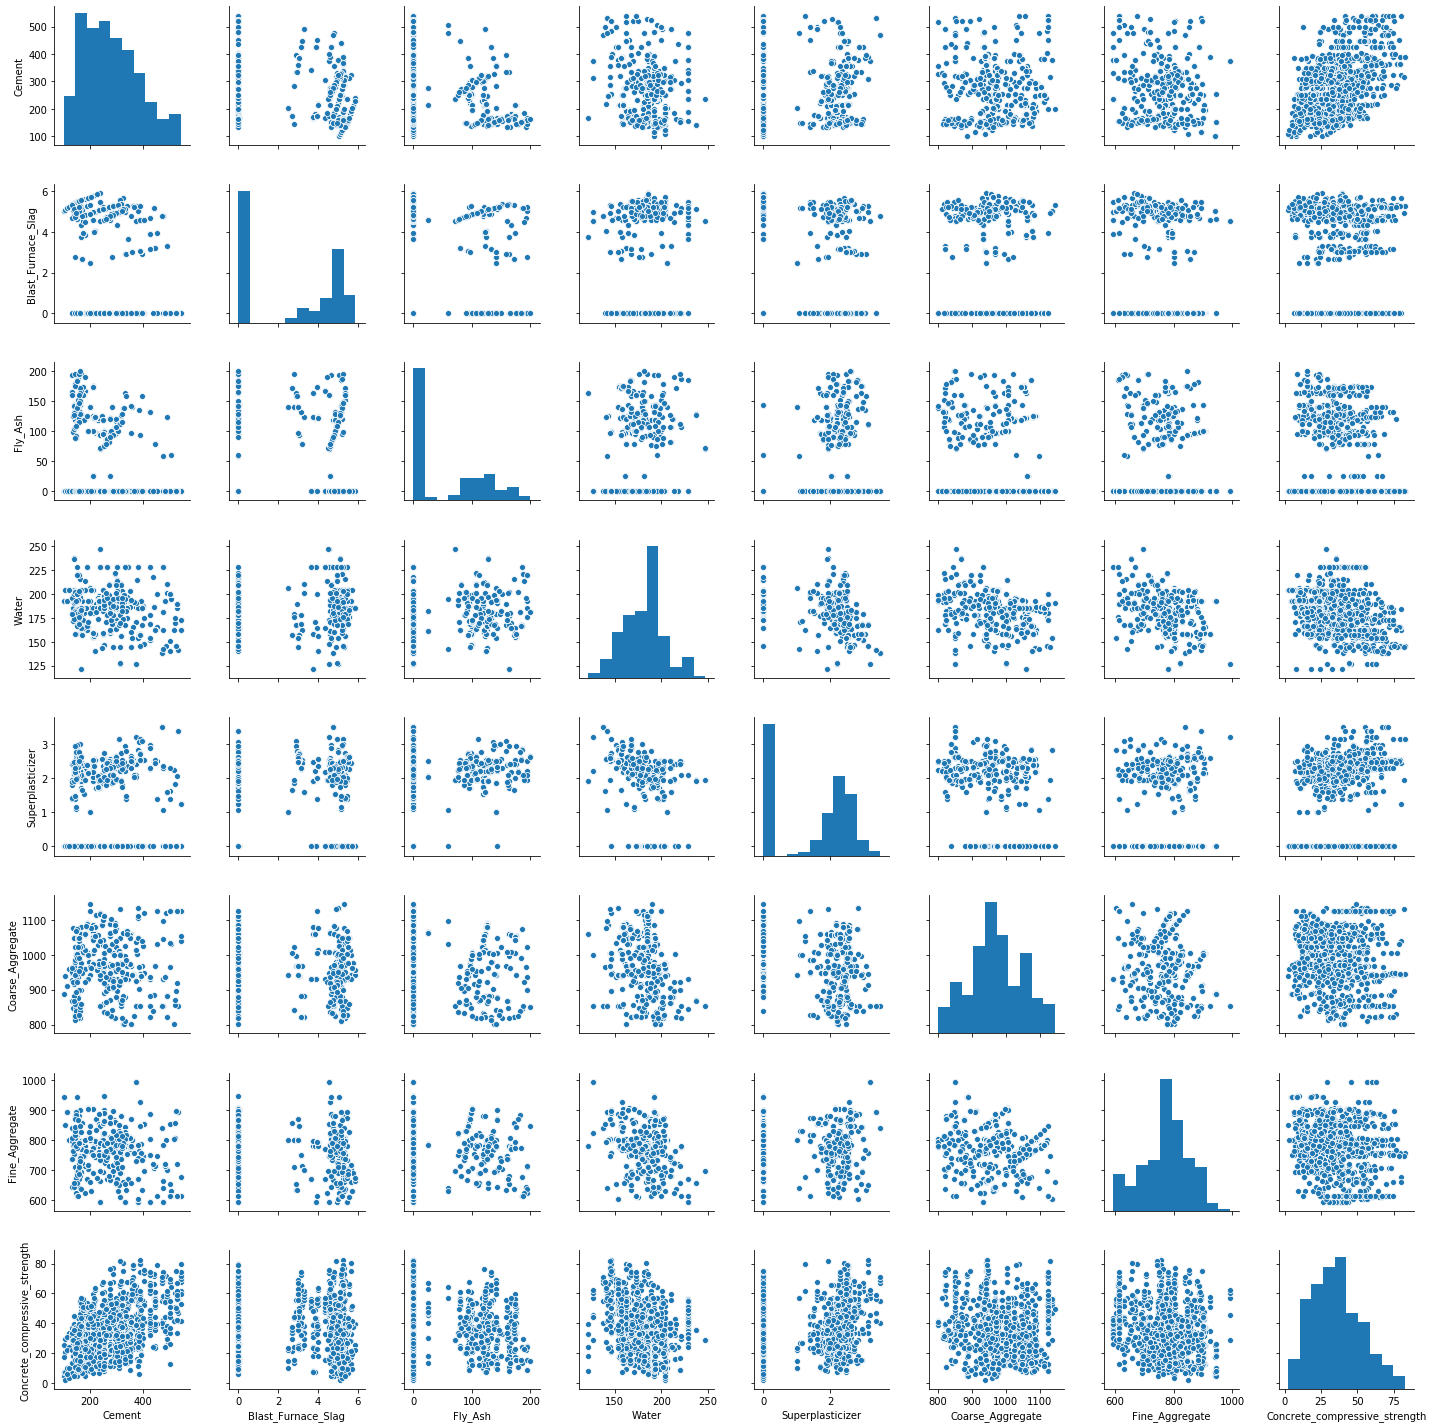

In [11]:
sns.pairplot(cs)

In [12]:
cs.shape

(1030, 8)

In [13]:
from scipy.stats import zscore
z=np.abs(zscore(cs))
csnew=cs.loc[(z<3).all(axis=1)]
csnew.shape

(1028, 8)

In [14]:
mod_x=cs.iloc[:,:-1]
y=cs.iloc[:,-1]

In [15]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x = ss.fit_transform(mod_x)

In [16]:
x=pd.DataFrame(x,columns=mod_x.columns)
x

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate
0,2.477918,-1.059409,-0.847132,-0.916663,-0.174967,0.863160,-1.217658
1,2.477918,-1.059409,-0.847132,-0.916663,-0.174967,1.056170,-1.217658
2,0.491443,1.000842,-0.847132,2.175367,-1.260193,-0.526514,-2.240913
3,0.491443,1.000842,-0.847132,2.175367,-1.260193,-0.526514,-2.240913
4,-0.790432,0.970565,-0.847132,0.488805,-1.260193,0.070531,0.647908
...,...,...,...,...,...,...,...
1025,-0.045623,0.916147,0.564569,-0.092122,0.725752,-1.323003,-0.065874
1026,0.392837,-1.059409,0.960095,0.676201,0.847964,-1.994679,0.496916
1027,-1.270057,0.991782,0.850661,0.521599,0.437771,-1.036061,0.080127
1028,-1.168580,1.112231,-0.847132,-0.279518,0.913788,0.214646,0.191188


In [17]:
from sklearn.metrics import r2_score
def random(alg,x,y):
    r_score=0
    for r_state in range(43,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r_state)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        r2scr=r2_score(y_test,pred)
        if r2scr > r_score:
            r_score= r2scr
            final_r=r_state
    print(r_score,'at',final_r)

In [18]:
def metrics(y_test,pred):
    print(mean_squared_error(y_test,pred))
    print(mean_absolute_error(y_test,pred))
    print(r2_score(y_test,pred))

In [19]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
lm=LinearRegression()
random(lm,x,y)

0.5280414355557239 at 89


In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=89)
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
metrics(y_test,pred)

140.55820224007496
9.583616659402503
0.5280414355557239


In [21]:
lmscore=cross_val_score(lm,x,y,cv=5)
print(lmscore.mean())
print(lmscore.std())

0.21158661178343435
0.07816812888097739


In [22]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
random(dtr,x,y)

0.4797141372158372 at 59


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=59)
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
metrics(y_test,pred)

156.49462066594415
9.554413366317636
0.47370479570095103


In [24]:
dtrscore=cross_val_score(dtr,x,y,cv=5)
print(dtrscore.mean())
print(dtrscore.std())

-0.3694790739507988
0.5302048763160915


In [25]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVR
svm=SVR()
random(svm,x,y)

0.4695836223268258 at 79


In [26]:
from sklearn.model_selection import GridSearchCV
parameters={'kernel':['rbf','linear'],'C':[1,10,100]}
grid=GridSearchCV(svm,parameters)
grid.fit(x_train,y_train)
print(grid.best_params_)

{'C': 1, 'kernel': 'linear'}


In [27]:
svm=SVR(kernel='linear')
svm.fit(x_train,y_train)
pred=svm.predict(x_test)
metrics(y_test,pred)

155.3791791961804
9.958795132152165
0.4774560524132574


In [28]:
from sklearn.externals import joblib
joblib.dump(lm,'concrete.pkl')

['concrete.pkl']